0.0025500629472428966
0.0023769298791952885
3.6158213857133834
3.22
3.479358248355442
2.5570223017603553


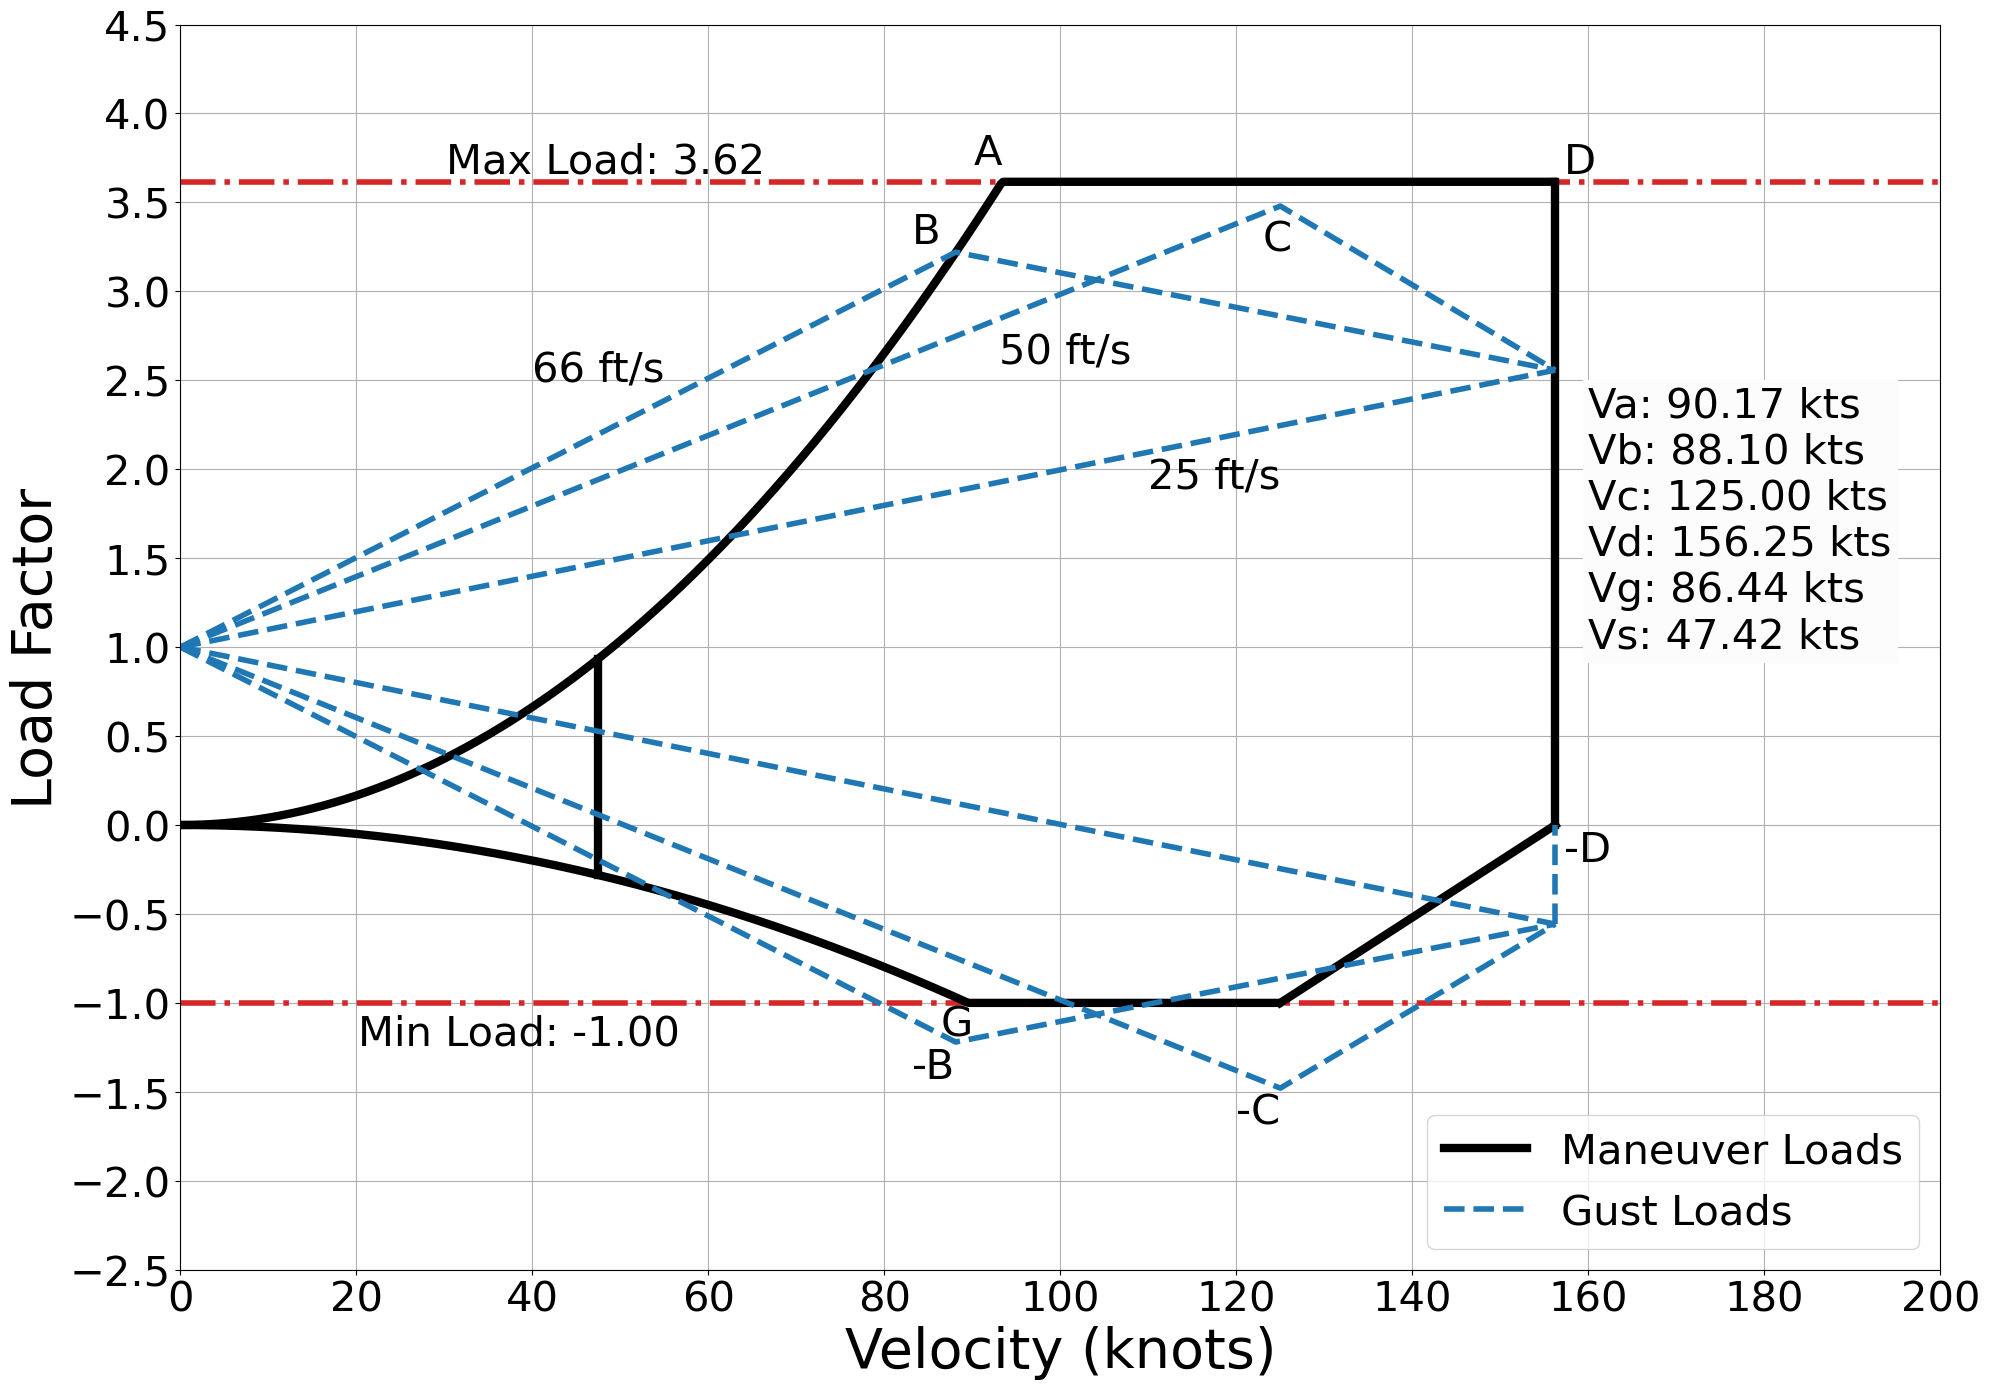

In [35]:
import numpy as np
import matplotlib.pyplot as plt

Vrangeknot = np.linspace(0, 200, 801)
Vrangeftsec = Vrangeknot * 1.688

def density_calc(T_dev, height):
    T = 59 + T_dev - (0.00356 * height)
    p = 2116 * (((T + 459.7) / 518.6)**(5.256))
    rho = p / (1718 * (T + 459.7))
    return rho
rho_500 = density_calc(30, 6000)
print(rho_500)
rho_sl = density_calc(0, 0)
print(rho_sl)
w = 5833
cbar = 7
b = 60
Sref = b * cbar
g = 32.174
sweep = 2
sos = 1128

CL_max = 1.7
CL_min = -0.5116
Vs1 = np.sqrt(2*w/(rho_500*Sref*CL_max))
Vs1_knot = Vs1 / 1.688
Vsneg1 = np.sqrt(-2*w/(rho_500*Sref*CL_min))
Vsneg1_knot = Vsneg1 / 1.688
n_pos_stall = (rho_sl * (Vrangeftsec**(2)) * CL_max) / (2 * w / Sref)
n_neg_stall = (rho_sl * (Vrangeftsec**(2)) * CL_min) / (2 * w / Sref)

max_load = 2.1 + (24000 / (w + 10000))
min_load = -1

Va = np.sqrt(2*w* max_load/(rho_500*Sref*CL_max)) / 1.688

Vc = 125 #knots
gust_c = 50 #ft/s
nrange_cruise = np.linspace(-1, max_load, 801)

Vd = 1.25 * Vc
gust_d = 25
nrange_dive = np.linspace(0, max_load, 801)

def n_gust(V,U_gust, sign):
    M = (V* 1.688) / 1128
    CL_alpha = 2 * np.pi * ( b / cbar) / (2 + (np.sqrt((((b/cbar)**2) * ((1 - (M**2)) / (0.97**2)) * ( 1 + ((np.tan( 2 / (2 * np.pi))**2) / (1 - (M**2))))) + 4)))
    mu = (2*w / Sref)/(rho_500 * cbar * CL_alpha * g)
    Kg = (0.88 * mu) / (5.3 + mu)
    n_gust = 1 + (sign*((Kg * U_gust * CL_alpha * V) / (498 * w / Sref)))
    return n_gust

gust_b = 66
Vb_line_pos = n_gust(Vrangeknot, gust_b, 1)
Vb_gust_pos = 88.10
Vb_n_pos = 3.22
Vb_line_neg = n_gust(Vrangeknot, gust_b, -1)
Vb_gust_neg = 88.10
Vb_n_neg = -1.22

Vc_n_pos = n_gust(Vc, gust_c, 1)
Vc_n_neg = n_gust(Vc, gust_c, -1)

Vd_n_pos = n_gust(Vd, gust_d, 1)
Vd_n_neg = n_gust(Vd, gust_d, -1)

plt.figure(figsize=(20,14))
#plt.title('V-n Diagram (Minimum Weight)', fontsize=40)
plt.xlabel("Velocity (knots)", fontsize=40)
plt.ylabel("Load Factor", fontsize=40)
#plt.plot(Vrangeknot, n_pos_stall, label='Pos Stall', linestyle='-', linewidth=6)
plt.plot(Vrangeknot, max_load * np.ones(801), linestyle='-.', linewidth=4, color = 'tab:red')
y_pos_stall_min = np.minimum((n_pos_stall), max_load * np.ones(801))
plt.plot(Vrangeknot[:625], y_pos_stall_min[:625], linestyle='-', linewidth=6, color = 'black', label="Maneuver Loads")

#plt.plot(Vrangeknot, n_neg_stall, label='Neg Stall', linestyle='-', linewidth=6)
plt.plot(Vrangeknot, min_load * np.ones(801),  linestyle='-.', linewidth=4, color = 'tab:red')
y_neg_stall_max = np.maximum((n_neg_stall), min_load * np.ones(801))
plt.plot(Vrangeknot[:500], y_neg_stall_max[:500], linestyle='-', linewidth=6, color = 'black')

plt.plot([Vs1_knot,Vs1_knot],[(rho_sl * (Vs1**(2)) * CL_min) / (2 * w / Sref), (rho_sl * (Vs1**(2)) * CL_max) / (2 * w / Sref)], linestyle='-', linewidth=6, color = 'black')

#plt.plot(Vc * np.ones(801),nrange_cruise , label='Cruise Wall', linestyle='-', linewidth=6)

plt.plot([Vc,Vd],[-1, 0], linestyle='-', linewidth=6, color = 'black')
plt.plot([Vd, Vd],[max_load, 0] , linestyle='-', linewidth=6, color = 'black')
plt.plot([Vd, Vd],[Vd_n_neg, 0] , linestyle='--', linewidth=4, color = 'tab:blue')

#plt.plot(Vrangeknot,Vb_line_pos , linestyle='--', linewidth=4, color = 'tab:blue')

#plt.plot(Vb_gust_pos,Vb_n_pos ,  marker="o", markersize=0, color = 'black')
#plt.plot(Vb_gust_neg,Vb_n_neg ,  marker="o", markersize=0, color = 'black')
plt.plot([0, Vb_gust_pos, Vd], [1, Vb_n_pos, Vd_n_pos],linestyle='--', linewidth=4, color = 'tab:blue', label="Gust Loads")
plt.plot([0, Vb_gust_pos, Vd], [1, Vb_n_neg, Vd_n_neg], linestyle='--', linewidth=4, color = 'tab:blue')

#plt.plot(Vc,Vc_n_pos, marker="o", markersize=0, color = 'black')
#plt.plot(Vc,Vc_n_neg , marker="o", markersize=0, color = 'black')
plt.plot([0, Vc, Vd], [1, Vc_n_pos, Vd_n_pos],linestyle='--', linewidth=4, color = 'tab:blue')
plt.plot([0, Vc, Vd], [1, Vc_n_neg, Vd_n_neg], linestyle='--', linewidth=4, color = 'tab:blue')

#plt.plot(Vd,Vd_n_pos ,  marker="o", markersize=0, color = 'black')
#plt.plot(Vd,Vd_n_neg , marker="o", markersize=0, color = 'black')
plt.plot([0, Vd], [1, Vd_n_pos],linestyle='--', linewidth=4, color = 'tab:blue')
plt.plot([0, Vd], [1, Vd_n_neg], linestyle='--', linewidth=4, color = 'tab:blue')

plt.text(Va ,max_load + 0.1 , 'A', fontsize = '30')
plt.text(Vb_gust_pos - 5,Vb_n_pos + 0.05 , 'B', fontsize = '30')
plt.text(Vb_gust_neg - 5,Vb_n_neg - 0.2 , '-B', fontsize = '30')
plt.text(Vsneg1_knot, (rho_sl * (Vsneg1**(2)) * CL_min) / (2 * w / Sref) - 0.25, 'G', fontsize = '30')
plt.text(Vc - 2,Vc_n_pos - 0.25 , 'C', fontsize = '30')
plt.text(Vc - 5,Vc_n_neg - 0.2 , '-C', fontsize = '30')
plt.text(Vd + 1,max_load + 0.05 , 'D', fontsize = '30')
plt.text(Vd + 1, - 0.2 , '-D', fontsize = '30')
plt.text(Va -60,max_load + 0.05 , 'Max Load: {:.3}'.format(max_load), fontsize = '30')
plt.text(Va -70, (rho_sl * (Vsneg1**(2)) * CL_min) / (2 * w / Sref) - 0.3, 'Min Load: -1.00', fontsize = '30')
plt.text(40,2.5 , '66 ft/s', fontsize = '30')
plt.text(93,2.6 , '50 ft/s', fontsize = '30')
plt.text(110,1.9 , '25 ft/s', fontsize = '30')
plt.text(160,1 , 'Va: {:.4} kts\nVb: 88.10 kts\nVc: 125.00 kts\nVd: {:.5} kts\nVg: {:.4} kts\nVs: {:.4} kts'.format(Va, Vd, Vsneg1_knot, Vs1_knot), fontsize = '30',backgroundcolor = '#FCFCFC')

print(max_load)
print(Vb_n_pos)
print(Vc_n_pos)
print(Vd_n_pos)

#plt.ylim(3.21, 3.23)
#plt.xlim(88.09,88.11)


plt.ylim(-2.5, 4.5)
plt.xlim(0, 200)
plt.yticks(np.arange(-2.5, 4.7, step=0.5), fontsize=30)
plt.xticks(np.arange(0, 220, step=20), fontsize=30)
plt.legend(loc=4, fontsize=30)
plt.tight_layout()
plt.grid()
plt.show()